In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Player Class Creation 

In [7]:
class Player:
    def __init__(self, name, begin_rating, games_played=0):
        self.name = name
        self.rating = begin_rating
        self.games_played = games_played
        
    def __repr__(self):
        return f'Rating:{self.rating}, Games Played: {self.games_played}' 
    
    def get_rating(self):
        return self.rating
    
    def get_games(self):
        return self.games_played
    
    def update_rating(self, new_rating):
        if new_rating > 99: # setting max
            self.rating = 99
            
        elif new_rating < 60: # setting min
            self.rating = 60
            
        else:
            self.rating = new_rating
        
    def update_games(self):
        self.games_played += 1

In [25]:
# K Scaling Factor Dictionary
k_scaler = {10:4, 25:2, 50:1, 100:0.5}
    # number of games (or less) played:k

l_scaler = {10:2, 25:1, 50:0.5, 100:0.25}
    # number of games (or less) played:l

How should K and L scalers be adjusted as games played increase? K definitely should go down (at what rate?), L is a little trickier to think about

In [59]:
def rating_algorithm(player_A, player_B, P_A, P_B, c=400):
    '''
    player_A (Player class): 
    player_B (Player class):
    P_A (float): Player A's Score
    P_B (float): Player B's Score
    c=400 (int): magic thing
    '''
    
    R_A = player_A.get_rating()
    R_B = player_B.get_rating()
    
    Q_A = 10**(R_A/c)
    Q_B = 10**(R_B/c)
    
    E_A = Q_A/(Q_A + Q_B)
    E_B = 1 - E_A
    
    
    if P_A > P_B:
        S_A = 1
        S_B = 0
        
    elif P_B > P_A:
        S_A = 0
        S_B = 1
    
    else:
        S_A, S_B = 0, 0 
        
        
    # setting k and l scalers: setting the same game marks for now
    # Player A
    for game_mark in k_scaler.keys():
        if player_A.get_games() <= game_mark:
            k_A = k_scaler[game_mark]
            #l_A = l_scaler[game_mark]
            l_A = 1
            break
            
    # Player B
    for game_mark in k_scaler.keys():
        if player_B.get_games() <= game_mark:
            k_B = k_scaler[game_mark]
            #l_B = l_scaler[game_mark]
            l_B = 1
            break    
    
    new_R_A = R_A + k_A*(S_A-E_A) + l_A*(P_A/(P_A + P_B)) # maybe l should just always be 1? or very small at least 
    new_R_B = R_B + k_B*(S_B-E_B) + l_B*(P_B/(P_A + P_B))
    # error if score ends 0-0 (never happen? hopefully)
    
    player_A.update_rating(new_R_A)
    player_B.update_rating(new_R_B)
    
    player_A.update_games()
    player_B.update_games()
    
    return f'Expected: ({E_A}, {E_B}) ... Player A: {R_A} -> {new_R_A} ... Player B: {R_B} -> {new_R_B}'

In [60]:
A = Player('JB', 65) 
B = Player('Paul', 70)
#rating_algorithm(JB, Paul, 18, 21, c=400)

In [61]:
n=99
A_rating = []
B_rating = []

A_wins = 0
B_wins = 0
Ties = 0
# would work better if ties just don't happen... not unrealistic to assume this or build it in 

for i in range(n):
    A_score = np.random.randint(2,22)
    B_score = np.random.randint(2,22)
    
    if A_score > B_score:
        A_wins += 1
        
    elif A_score < B_score:
        B_wins += 1
        
    else:
        Ties += 1
    
    output = rating_algorithm(A, B, A_score, B_score)
    
    A_rating.append(A.get_rating())
    B_rating.append(B.get_rating())
    
    print(f'Game {i}: Player A ({A_score}) vs. Player B ({B_score}) {output}')

Game 0: Player A (3) vs. Player B (19) Expected: (0.4928049182909485, 0.5071950817090515) ... Player A: 65 -> 63.16514396319984 ... Player B: 70 -> 72.83485603680015
Game 1: Player A (13) vs. Player B (6) Expected: (0.4860877576673387, 0.5139122423326613) ... Player A: 63.16514396319984 -> 65.90500345884628 ... Player B: 72.83485603680015 -> 71.0949965411537
Game 2: Player A (8) vs. Player B (5) Expected: (0.492531555064266, 0.5074684449357341) ... Player A: 65.90500345884628 -> 68.55026185397384 ... Player B: 71.0949965411537 -> 69.44973814602615
Game 3: Player A (14) vs. Player B (5) Expected: (0.49870555245348225, 0.5012944475465178) ... Player A: 68.55026185397384 -> 71.29228174942307 ... Player B: 69.44973814602615 -> 67.70771825057692
Game 4: Player A (18) vs. Player B (9) Expected: (0.5051584185208966, 0.4948415814791034) ... Player A: 71.29228174942307 -> 73.93831474200616 ... Player B: 67.70771825057692 -> 66.06168525799383
Game 5: Player A (15) vs. Player B (20) Expected: (0.

44


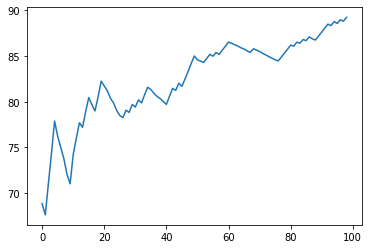

In [55]:
plt.plot(A_rating)
print(A_wins)

49


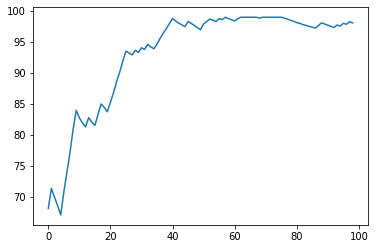

In [56]:
plt.plot(B_rating)
print(B_wins)

### K Scaler Effect